In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

from os import walk

#path1 = '../../../data/2018_01_10/'
path1 = '../../../data/2018_03_05/'

In [2]:
verbose = True

f = [] # empty list of files
for (dirpath, dirnames, filenames) in walk(path1):
    f.extend(filenames)

# sort list alphabetically
f.sort()
# remove non .tsv files from list
f = [x for x in f if x[-4:]==".tsv"]

# get length of filename list
f_len = len(f)

if verbose:
    for ii in range(f_len):
        print(ii, f[ii])

0 1112-grating-grating_1.tsv
1 1112-grating-grating_2.tsv
2 1113-grating-grating_3.tsv
3 1114-grating-grating_4.tsv
4 1115-grating-grating_5.tsv
5 1345-tunics_calibration.tsv
6 1355-through_1.tsv
7 1358-through_2.tsv
8 1400-through_3.tsv
9 1403-through_4.tsv
10 1405-through_5.tsv
11 1411-drop8_1.tsv
12 1414-drop8_2.tsv
13 1416-drop8_3.tsv
14 1421-drop8_4.tsv
15 1425-drop8_5.tsv
16 1430-drop7_1.tsv
17 1436-drop7_2.tsv
18 1439-drop7_3.tsv
19 1443-drop7_4.tsv
20 1446-drop7_5.tsv
21 1451-drop6_1.tsv
22 1453-drop6_2.tsv
23 1456-drop6_3.tsv
24 1501-drop6_4.tsv
25 1504-drop6_5.tsv
26 1508-drop5_1.tsv
27 1511-drop5_2.tsv
28 1513-drop5_3.tsv
29 1515-drop5_4.tsv
30 1517-drop5_5.tsv
31 1520-drop5_5b.tsv
32 1528-drop4_1.tsv
33 1530-drop4_2.tsv
34 1533-drop4_3.tsv
35 1535-drop4_4.tsv
36 1537-drop4_5.tsv
37 1541-drop3_1.tsv
38 1543-drop3_2.tsv
39 1546-drop3_3.tsv
40 1548-drop3_4.tsv
41 1550-drop3_5.tsv
42 1555-drop2_1.tsv
43 1557-drop2_2.tsv
44 1600-drop2_3.tsv
45 1602-drop2_4.tsv
46 1605-drop2_5.ts

In [3]:
namelist = {}

namelist['grating'] = [x for x in f if x[5:12]=="grating"]

namelist['tunics'] = [x for x in f if x[5:11]=="tunics"]

namelist['drop1'] = [x for x in f if (x[5:10]=="drop1" and x[12]=='.')]
namelist['drop1_1533'] = [x for x in f if x[5:15]=="drop1_1533"]
namelist['drop1_1552'] = [x for x in f if x[5:15]=="drop1_1552"]
namelist['drop2'] = [x for x in f if x[5:10]=="drop2"]
namelist['drop3'] = [x for x in f if x[5:10]=="drop3"]
namelist['drop4'] = [x for x in f if x[5:10]=="drop4"]
namelist['drop5'] = [x for x in f if x[5:10]=="drop5"]
namelist['drop6'] = [x for x in f if x[5:10]=="drop6"]
namelist['drop7'] = [x for x in f if x[5:10]=="drop7"]
namelist['drop8'] = [x for x in f if x[5:10]=="drop8"]

namelist['through'] = [x for x in f if x[5:12]=="through"]

In [4]:
data = {}
for ii,nn in namelist.items():
    temp = []
    for name in nn:
        temp.append( np.loadtxt(path1+name, skiprows=3) )
    temp = np.array( temp )
    print('%s: '%ii, temp.shape)
    data[ii] = temp.copy()

through:  (5, 251, 3)
tunics:  (1, 13, 2)
drop1_1552:  (5, 241, 3)
drop8:  (5, 251, 3)
drop4:  (5, 251, 3)
drop3:  (5, 251, 3)
drop2:  (5, 251, 3)
drop1:  (5, 251, 3)
grating:  (5, 61, 3)
drop7:  (5, 251, 3)
drop5:  (6, 251, 3)
drop6:  (5, 251, 3)
drop1_1533:  (5, 241, 3)


In [5]:
# correct data from through to drop5, except drop5_5b
list = ['grating', 'through', 'drop8', 'drop7', 'drop6', 'drop5']
for name in list:
    data[name][:5,:,2] = data[name][:5,:,2]/50.0
del list

0.11661970909090906


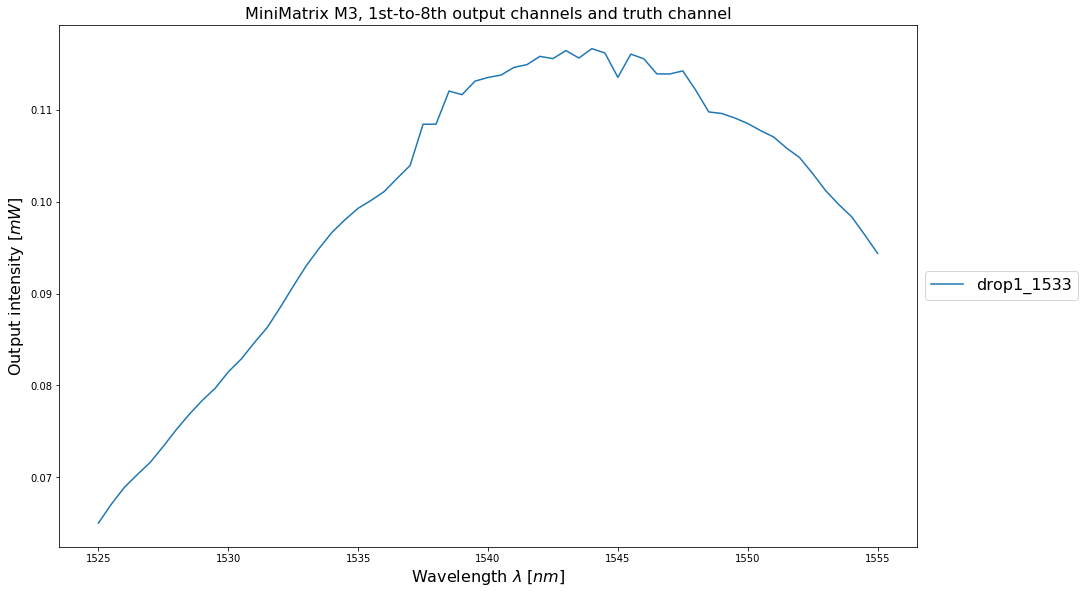

In [28]:
print( max(np.mean( data['grating'][:,:,2], axis=0  )/0.275)  )

fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ax1.plot( data['grating'][0,:,0] , np.mean( data['grating'][:,:,2], axis=0  )/0.275, label=ii)

ax1.set_title( r'MiniMatrix M3, 1st-to-8th output channels and truth channel', fontsize=16)
ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Output intensity $[mW]$', fontsize=16)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(loc='center left', fontsize=16, bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

In [7]:
grating = interp1d( data['grating'][0,:,0] , np.mean( data['grating'][:,:,2], axis=0  ), kind='cubic' )

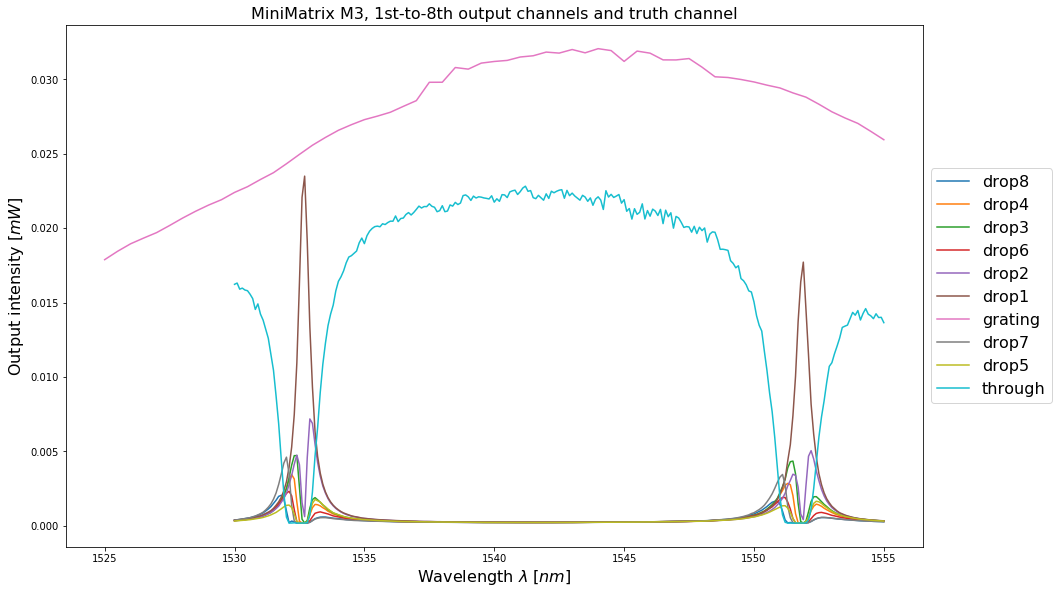

In [13]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

for ii,dd in data.items():
    if (ii!='tunics' and len(ii)<8):
        ax1.plot( dd[0,:,0] , np.mean( dd[:,:,2], axis=0  ), label=ii)

ax1.set_title( r'MiniMatrix M3, 1st-to-8th output channels and truth channel', fontsize=16)
ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Output intensity $[mW]$', fontsize=16)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(loc='center left', fontsize=16, bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

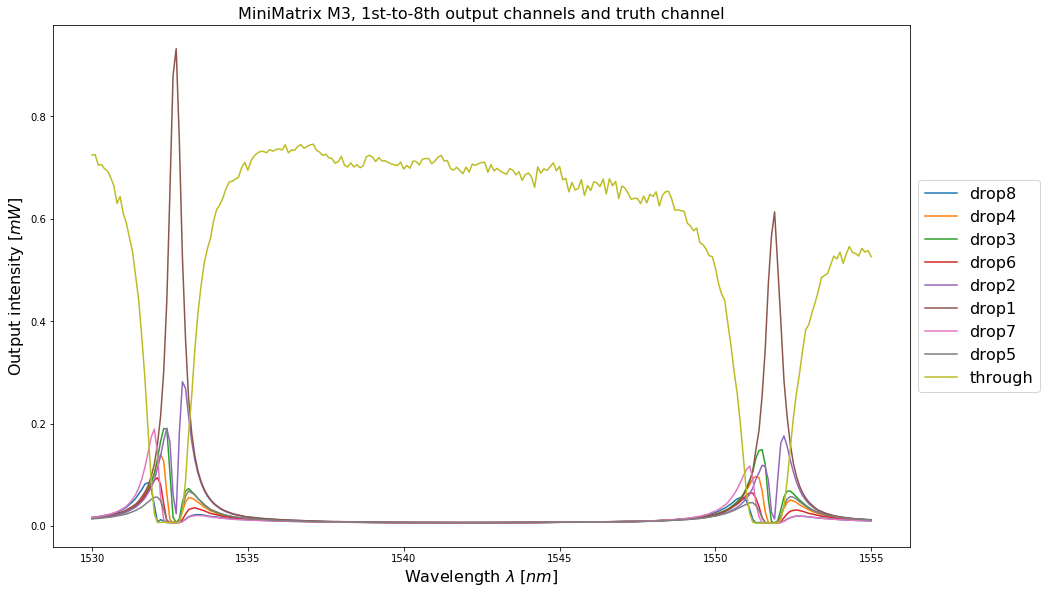

In [14]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

for ii,dd in data.items():
    if (ii!='grating' and ii!='tunics' and len(ii)<8):
        ax1.plot( dd[0,:,0] , np.mean( dd[:,:,2], axis=0  )/grating(dd[0,:,0])  , label=ii)

ax1.set_title( r'MiniMatrix M3, 1st-to-8th output channels and truth channel', fontsize=16)
ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Output intensity $[mW]$', fontsize=16)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(loc='center left', fontsize=16, bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

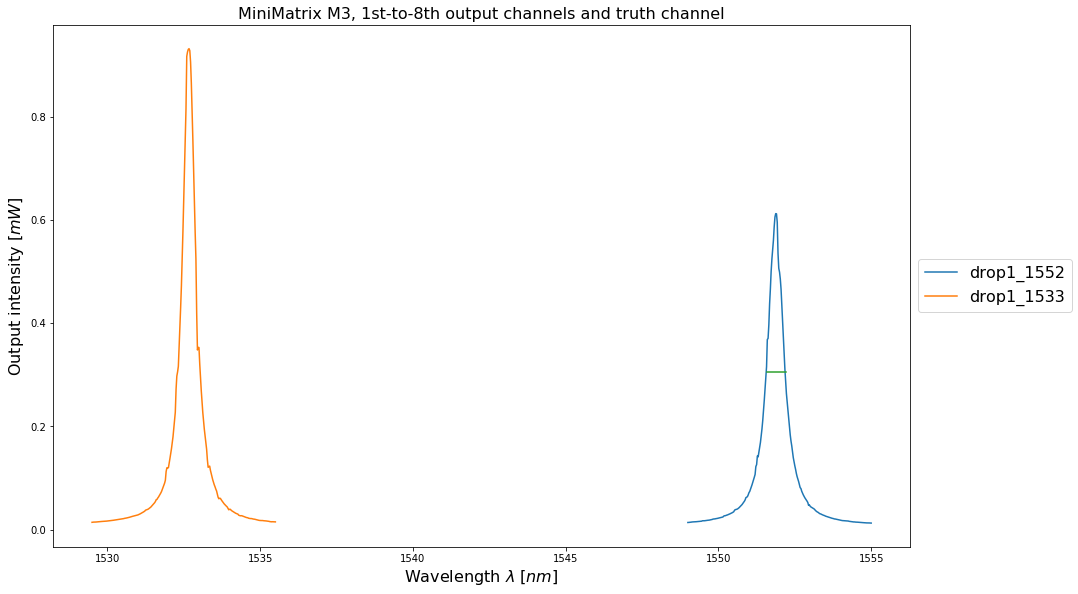

In [37]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

for ii,dd in data.items():
    if len(ii)>8:
        ax1.plot( dd[0,:,0] , np.mean( dd[:,:,2], axis=0  )/grating(dd[0,:,0]) , label=ii)

ax1.plot( [1551.6,1552.2], [0.306, 0.306] )

ax1.set_title( r'MiniMatrix M3, 1st-to-8th output channels and truth channel', fontsize=16)
ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Output intensity $[mW]$', fontsize=16)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(loc='center left', fontsize=16, bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

In [34]:
for ii,dd in data.items():
    if len(ii)>8:
        print()
        values = dd[:,:,2]/grating(dd[0,:,0])
        maxindex = np.argmax( values, axis=1 )
        print( 'max = %.3f'%max( np.mean( dd[:,:,2], axis=0  )/grating(dd[0,:,0]) ) )
        
        #print( dd[ range(5), maxindex, 0] )
        max_avg = np.max( dd[ range(5), maxindex, 0] )
        max_std = np.std( dd[ range(5), maxindex, 0] )
        print( '  λ = (%.3f +- %.3f) nm'%(max_avg, max_std) )
        
        halfindex = np.array([ dd[jj, values[jj,:]>values[jj,maxindex[jj]]/2.0, 0] for jj in range(5) ])
        #print(halfindex)
        fwhm_avg = np.max( halfindex[:,-1] - halfindex[:,0] )
        fwhm_std = np.std( halfindex[:,-1] - halfindex[:,0] )
        print( ' Δλ = (%.3f +- %.3f) nm'%(fwhm_avg, fwhm_std) )
        


max = 0.612
  λ = (1551.900 +- 0.010) nm
 Δλ = (0.600 +- 0.000) nm

max = 0.932
  λ = (1532.675 +- 0.034) nm
 Δλ = (0.475 +- 0.000) nm


In [21]:
from scipy.stats import linregress

tunics = linregress(data['tunics'][0,:,0] , data['tunics'][0,:,1])

In [22]:
print(tunics)

LinregressResult(slope=0.9425054945054935, intercept=87.47538461538625, rvalue=0.999998547069192, pvalue=8.306111526948216e-32, stderr=0.0004844238149507297)


In [46]:
## save data to file
x = data['grating'][0,:,0].reshape(1, 61)
y = (np.mean( data['grating'][:,:,2], axis=0  )/0.275).reshape(1, 61)
dat = np.vstack( (x, y) )
print( np.shape(dat) )
np.savetxt("grating.csv", dat.T, fmt='%.8f', delimiter="\t")
del x, y, dat


x = data['drop1_1552'][0,:,0].reshape(1, 241)
y = (np.mean( data['drop1_1552'][:,:,2], axis=0  )/grating(dd[0,:,0])).reshape(1, 241)
dat = np.vstack( (x, y) )
print( np.shape(dat) )
np.savetxt("res1552.csv", dat.T, fmt='%.8f', delimiter="\t")
del x, y, dat

header = ['wavelength',]
caller = ['drop1', 'drop2', 'drop3', 'drop4', 'drop5', 'drop6', 'drop7', 'drop8', 'through']
yy = data['drop1'][0,:,0].reshape(1, 251)
for names in caller:
    header.append(names)
    temp = np.mean( data[names][:,:,2], axis=0  )/grating(data[names][0,:,0]).reshape(1,251)
    yy = np.concatenate( (yy, temp ), axis=0 )
del temp
print(yy.shape)

np.savetxt("m3.csv", yy.T, fmt='%.8f', delimiter="\t", header='\t'.join(header), comments='')


(2, 61)
(2, 241)
(10, 251)
